# Exploratory Data Analysis of 2015 Pharmaceutical Retail Sales
## Dataset
In this analysis, we will explore the [pharma_sales_product_2015](https://www.kaggle.com/datasets/tigernaing/pharmaceutical-retails-sales-2015/data) dataset available on Kaggle to manage inventory and understand sales pattern. 

We will focus on:

* **Product Sales Distribution**: Overview of sales distribution by product.
* **High-Frequency Sales Products**: Identification of products sold most frequently.
* **Low-Frequency Sales Products**: Overview of low sales products.
* **Monthly Sales Patterns**: Investigation of monthly sales patterns.
>Run this notebook on [mybinder.org](https://mybinder.org/v2/gh/T-Naing/Jupyter/HEAD?urlpath=%2Fdoc%2Ftree%2FEDA_pharma_retails_2015%2FEDA_pharma_retails_2015.ipynb).
>
>https://mybinder.org/v2/gh/T-Naing/Jupyter/HEAD?urlpath=%2Fdoc%2Ftree%2FEDA_pharma_retails_2015%2FEDA_pharma_retails_2015.ipynb

In [1]:
import os 

In [2]:
path=os.getcwd()

In [3]:
os.listdir(path)

['.ipynb_checkpoints',
 '.jupyter',
 'EDA_pharma_retails_2015-Copy1.ipynb',
 'EDA_pharma_retails_2015.ipynb',
 'Monthly Sales Frequency in 2015.png',
 'pharma_sales_product_2015.csv']

>I've downloaded the dataset from Kaggle, so we have 'pharma_sales_product_2015.csv' ready in the current folder.

We will install the necessary packages: pandas, matplotlib, and seaborn.

In [4]:
!pip install pandas

In [5]:
!pip install matplotlib

In [6]:
!pip install seaborn

### Import the Dataset
We will import the **pharma_sales_product_2015.csv** file into a pandas DataFrame.

In [7]:
import pandas as pd

In [8]:
pharma_df=pd.read_csv('./pharma_sales_product_2015.csv')

In [9]:
pharma_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22800 entries, 0 to 22799
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   InvoiceNo     22800 non-null  int64 
 1   InvoiceDate   22800 non-null  object
 2   ProductNo     22800 non-null  int64 
 3   Quantity      22800 non-null  int64 
 4   Unit          22800 non-null  object
 5   ProductName   22800 non-null  object
 6   PackSize      22800 non-null  object
 7   ChemicalName  22800 non-null  object
dtypes: int64(3), object(5)
memory usage: 1.4+ MB


In [10]:
pharma_df.describe()

,InvoiceNo,ProductNo,Quantity
count,22800.000000,22800.000000,22800.000000
mean,1390.206930,344.387544,3.067982
std,815.208128,240.861419,12.369806
min,1.000000,1.000000,1.000000
25%,706.000000,142.000000,1.000000
50%,1266.000000,304.000000,1.000000
75%,2076.250000,531.000000,2.000000
max,2962.000000,954.000000,972.000000


In [11]:
pharma_df.sample(5)

,InvoiceNo,InvoiceDate,ProductNo,Quantity,Unit,ProductName,PackSize,ChemicalName
15444,1848,25/8/2015,841,1,stp,Scanneuron,10 tab * 10 stp * box,"B1 100mg, B6 200mg, B12 200mcg"
20993,2693,30/11/2015,84,2,stp,Cardivas 3.125,10 tab * 3 stp * box,Carvedilol
17089,2072,20/9/2015,2,10,sac,Royal D,50 sac * 20 box * 2ndBox,Electrolyte Beverage
1013,221,18/1/2015,109,2,stp,Vastarel Mr,30 tab * 2 stp * box,Trimetazidine Hydrochloride
7186,846,19/4/2015,249,1,stp,Etoshine 90,10 tab * 5 stp * box,Etoricoxib


In [12]:
# pharma_df.head()

In [13]:
# pharma_df.tail()

In [14]:
# len(pharma_df.ProductNo.value_counts())

In [15]:
# pharma_df.ProductNo.value_counts()

In [16]:
pharma_df.ProductNo.nunique()

873

### Overview of the Dataset
>The dataset comprises 8 columns and contains information about product sales, including InvoiceNo, InvoiceDate, Quantity, and other product details. It consists of 22,800 records.
>
>The dataset contains sales data from January 1, 2015, to December 31, 2015. A total of 873 products were sold during this period.

## Data Preparation
### Unit Conversion 
In our dataset, products were sold in various unit types. By utilizing pack size information (e.g., `20 tabs * 5 strips * box`), we will standardize the '*Quantity*' and '*Unit*' into the most commonly used sales unit and calculate the corresponding quantities (e.g., `50` `stp`) for each product before analyzing the data.

In [17]:
def conversion_table(pack):
    conversions=pack.split('*')
    conversions[-1]='1 '+conversions[-1].strip()
    conversion_table=[]
    
    for conversion in conversions:
        q,u=conversion.strip().split()
        conversion_table.append((int(q),u))
    
    return conversion_table

In [18]:
def get_index(conversion_table,from_unit,to_unit):
    from_i=to_i=-1
    for i, item in enumerate(conversion_table):
        if item[1]==from_unit:
            from_i=i
        elif item[1]==to_unit:
            to_i=i
    return from_i, to_i

In [19]:
def convert(qty,from_unit,to_unit,pack):
    table=conversion_table(pack)
    from_index, to_index= get_index(table,from_unit,to_unit)
    
    if from_index !=-1 and to_index!=-1 :        
        if from_index>to_index:
            # print('big to small')
            for j in table[to_index:from_index]:
                qty=qty*j[0]
            return_unit=table[to_index][1] 
        elif from_index<to_index:
            # print('small to big')
            for j in table[from_index:to_index]:
                qty=qty/j[0]       
            return_unit=table[to_index][1]
    else:
        return_unit=from_unit            
    return qty,return_unit

In [20]:
conversion_table('20 tab * 5 stp * box')

[(20, 'tab'), (5, 'stp'), (1, 'box')]

In [21]:
get_index (conversion_table('20 tab * 5 stp * box'), 'box', 'tab')

(2, 0)

In [22]:
convert(50,'box', 'tab','20 tab * 5 stp * box')

(5000, 'tab')

In [23]:
convert(50,'tab', 'box','20 tab * 5 stp * box')

(0.5, 'box')

In [24]:
conversion_table('20 tab * 5 stp * box')[-1][-1]

'box'

In [25]:
# Group by ProductNo and Unit, and aggregate data
agg_temp_df = pharma_df.groupby(['ProductNo', 'Unit']).agg({
    'ProductName': 'first',
    'PackSize':'first',
    'Quantity': 'sum',
    'InvoiceNo': 'count'
}).reset_index()
agg_temp_df.rename(columns={'InvoiceNo':'InvoiceCount'},inplace=True)
agg_temp_df

,ProductNo,Unit,ProductName,PackSize,Quantity,InvoiceCount
0,1,box,EVE,10 cap * 3 stp * box,1,1
1,1,stp,EVE,10 cap * 3 stp * box,46,40
2,2,box,Royal D,50 sac * 20 box * 2ndBox,1,1
3,2,sac,Royal D,50 sac * 20 box * 2ndBox,597,119
4,3,box,Eposoft,10 cap * 3 stp * box,9,9
...,...,...,...,...,...,...
1103,948,stp,Zifam Clofen SR,10 tab * 3 stp * 5 box * 2ndBox,1,1
1104,949,stp,Alerday 180,10 tab * 10 stp * box,1,1
1105,950,bot,Metrogyl Syp,bot,1,1
1106,951,bot,V.Rohto Cool,bot,1,1


In [26]:
# get the index of the most frequent sales unit 
idx = agg_temp_df.groupby(['ProductNo'])['InvoiceCount'].idxmax()

frequent_units_df = agg_temp_df.loc[idx, ['ProductNo', 'ProductName', 'Unit']].rename(columns={'Unit': 'FrequentUnit'})
# print(frequent_units)

In [27]:
df=pharma_df.merge(frequent_units_df,on=['ProductNo', 'ProductName'])

In [28]:
# df.sample(10)

In [29]:
def apply_conversion(row):
    if row['Unit'] != row['FrequentUnit']:
        row['Quantity'], row['Unit'] = convert(row['Quantity'], row['Unit'], row['FrequentUnit'], row['PackSize'])
    return row

In [30]:
df = df.apply(apply_conversion, axis=1)

In [31]:
sum(df['Unit']!=df['FrequentUnit'])

0

In [32]:
df.drop(columns='FrequentUnit',inplace=True)

In [33]:
df.sample()

,InvoiceNo,InvoiceDate,ProductNo,Quantity,Unit,ProductName,PackSize,ChemicalName
3230,457,20/2/2015,769,3.0,bot,Hydrogen Peroxide,bot,Hydrogen Peroxide


## Exploratory Analaysis

In [34]:
import matplotlib.pyplot as plt
import matplotlib_inline
import seaborn as sns
sns.set_style('darkgrid')
plt.rcParams['font.size']=14
plt.rcParams['figure.figsize']=[9,5]

In [35]:
agg_explore_df=df.groupby(['ProductNo', 'Unit']).agg({
    'ProductName': 'first',
    'PackSize':'first',
    'Quantity': 'sum',
    'InvoiceNo': 'count'
}).reset_index()
agg_explore_df.rename(columns={'InvoiceNo':'InvoiceCount'},inplace=True)

In [36]:
# Rearrange the columns order
agg_explore_df=agg_explore_df[['ProductNo','ProductName','PackSize','Quantity','Unit','InvoiceCount']]
agg_explore_df.sort_values('InvoiceCount',ascending=False,inplace=True)

In [37]:
# agg_explore_df

### Product Sales Distribution
We will examine the distribution of sales by product.

In [38]:
agg_explore_df.InvoiceCount.describe()

count    873.000000
mean      26.116838
std       38.984737
min        1.000000
25%        5.000000
50%       12.000000
75%       31.000000
max      360.000000
Name: InvoiceCount, dtype: float64

In [39]:
import numpy as np
# Calculate key statistics
invoice_counts = agg_explore_df['InvoiceCount']
median = np.median(invoice_counts) 
q1 = np.percentile(invoice_counts, 25) #Q1 is the median of the first half of the data
q3 = np.percentile(invoice_counts, 75)
iqr = q3 - q1
lower_whisker = max(min(invoice_counts), q1 - 1.5 * iqr)
upper_whisker = min(max(invoice_counts), q3 + 1.5 * iqr)

In [40]:
# print('median:',median)
# print('q1:',q1)
# print('q3:',q3)
print('lower_whisker:',lower_whisker)
print('upper_whisker:',upper_whisker)

lower_whisker: 1
upper_whisker: 70.0


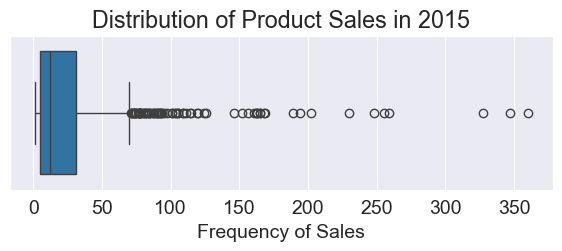

In [41]:
plt.figure(figsize=(7,2))
sns.boxplot(data=agg_explore_df,x=agg_explore_df.InvoiceCount)

plt.title('Distribution of Product Sales in 2015')
plt.xlabel('Frequency of Sales');

>**Summary**
>
>In 2015:<br>
>* A total of 873 products were sold.
>* The average number of sales per product was 26.
>* The product with the least sales was sold only once.
>* 25% of the products were sold 5 times or fewer.
>* The median number of sales per product was 12, meaning 50% of the products were sold 12 times or fewer.
>* 75% of the products were sold 31 times or fewer.
>* The standard deviation of sales was approximately 38.98. On average, the sales count of a product can deviate by around 39 units from the mean of 26. This means that most product sales likely fall within the range of 26 ± 39.


### High-performing Products
The outliers in the box plot, titled **'Distribution of Product Sales in 2015'**, indicate products with significantly higher sales. These products outperform others and can be considered high-performing in terms of sales frequency.

In [42]:
high_performing_df = agg_explore_df[agg_explore_df['InvoiceCount'] >upper_whisker].reset_index()

In [43]:
high_performing_df.shape

(78, 7)

>**Summary**
>
>There are 78 high-performing products with significantly higher sales compared to the rest of the dataset.<br>
>These products should be well-stocked.

In [44]:
# Update the product name for the specific row using .loc 
high_performing_df.loc[59, 'ProductName']+='$'

### 78 High-Performing Products
We will visualize the top 78 high-performing products in their most frequent sales units along with their respective sales figures. Please note that the '?' symbols in the product names are a result of font differences and represent non-English words.

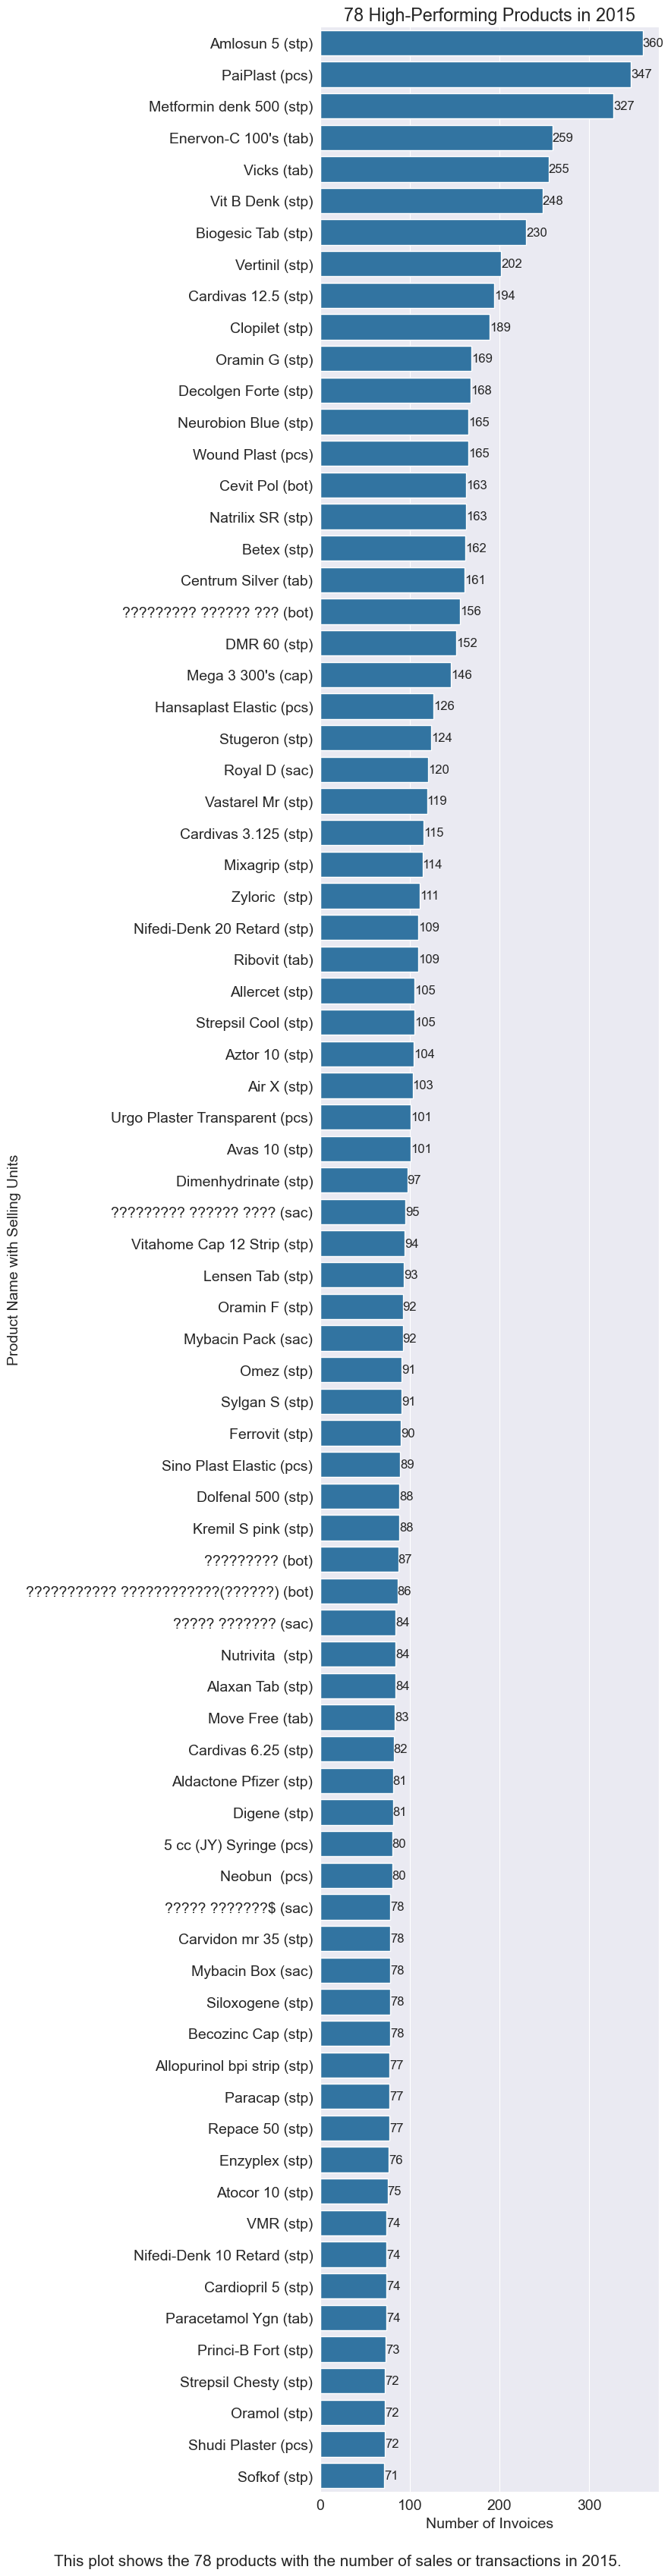

In [45]:
high_performing_df = high_performing_df.sort_values('InvoiceCount', ascending=False)

plt.figure(figsize=(9,34))
ax=sns.barplot(x='InvoiceCount',y='ProductName',data=high_performing_df)

# Add text annotations for each bar
for idx, value in enumerate(high_performing_df['InvoiceCount']):
    ax.text(value, idx, str(value), ha='left', va='center',fontsize=12)
    
labels = [f"{product} ({unit})" for product, unit in zip(high_performing_df.ProductName, high_performing_df.Unit)]

# Customize y-tick labels
plt.yticks(ticks=range(len(high_performing_df)), labels=labels)

plt.xlabel('Number of Invoices')
plt.ylabel('Product Name with Selling Units')
plt.title('78 High-Performing Products in 2015')
plt.annotate('This plot shows the 78 products with the number of sales or transactions in 2015.',
             xy=(0.05, -0.03), xycoords='axes fraction',
             ha='center', fontsize=15)
plt.tight_layout();
# plt.figtext(0.4, -0.1, "This plot shows the 15 products with the highest number of sales or transactions.", wrap=True, horizontalalignment='center', fontsize=12);

### Products Sold 5 Times or Fewer
There are many factors to consider when deciding whether to keep products in the store, such as trends and product types. However, since every product has an expiration date, it is essential to analyze the products with low sales frequency. 

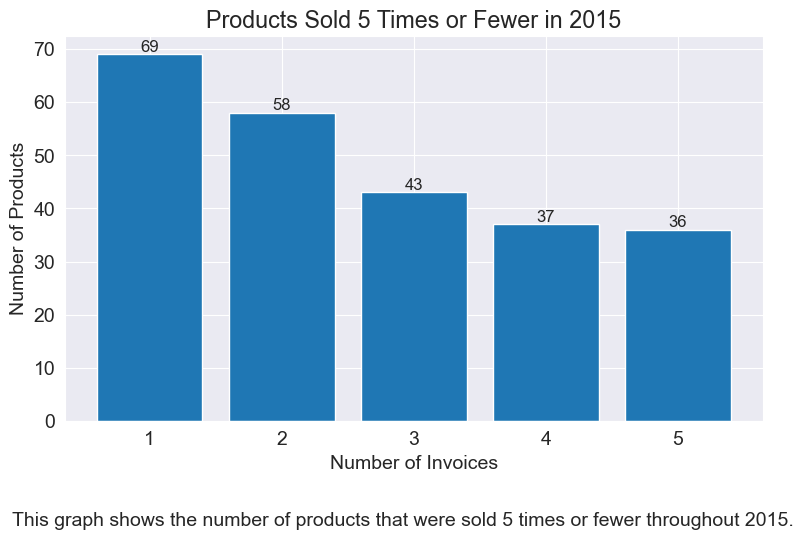

In [46]:
lowest_sales_df=agg_explore_df.groupby('InvoiceCount').agg({'ProductName':'count'}).sort_values(by='InvoiceCount')
plt.bar(x=lowest_sales_df.head(5).index,height='ProductName',data=lowest_sales_df.head(5))

for idx, value in enumerate(lowest_sales_df['ProductName'].head(5)):
    plt.text(lowest_sales_df.index[idx], value, str(value), ha='center', va='bottom', fontsize=12)
    
plt.title('Products Sold 5 Times or Fewer in 2015')
plt.xlabel('Number of Invoices')
plt.ylabel('Number of Products')
plt.figtext(0.5, -0.1, "This graph shows the number of products that were sold 5 times or fewer throughout 2015.", wrap=True, horizontalalignment='center', fontsize=14);

>**Summary**
>
>In 2015, a total of 873 products were sold. Notably, 243 products were sold five times or fewer. These low-performing products should be analyzed further for trends, usage, product types, or chemical composition to decide whether they should remain in the store.<br>
>To sell these products more quickly, maybe a targeted strategy should be developed, taking their context into account.

### Frequency of Sales by Month
To gain an overview of sales, we will analyze the frequency of sales by month.

#### DateTime Conversion
The dataset includes an '*InvoiceDate*' column, which is currently an object data type. We need to transform it into a DateTime data type to enable us to extract the month from the InvoiceDate.

In [47]:
df['InvoiceDate']=pd.DatetimeIndex(pharma_df.InvoiceDate)

In [48]:
df['Month']=pd.DatetimeIndex(pharma_df.InvoiceDate).month
df['MonthName']=pd.DatetimeIndex(pharma_df.InvoiceDate).month_name()
# df['Day']=pd.DatetimeIndex(pharma_df.InvoiceDate).day
# df['WeekDay']=pd.DatetimeIndex(pharma_df.InvoiceDate).weekday
# df['DayName']=pd.DatetimeIndex(pharma_df.InvoiceDate).day_name()

In [49]:
# df

In [50]:
sales_frequency_by_month_df=pd.DataFrame(df.groupby(['Month']).agg(
    {
        'MonthName':'first',
        'InvoiceNo':'count'
    }).sort_values('Month'))

In [51]:
# sales_frequency_by_month_df

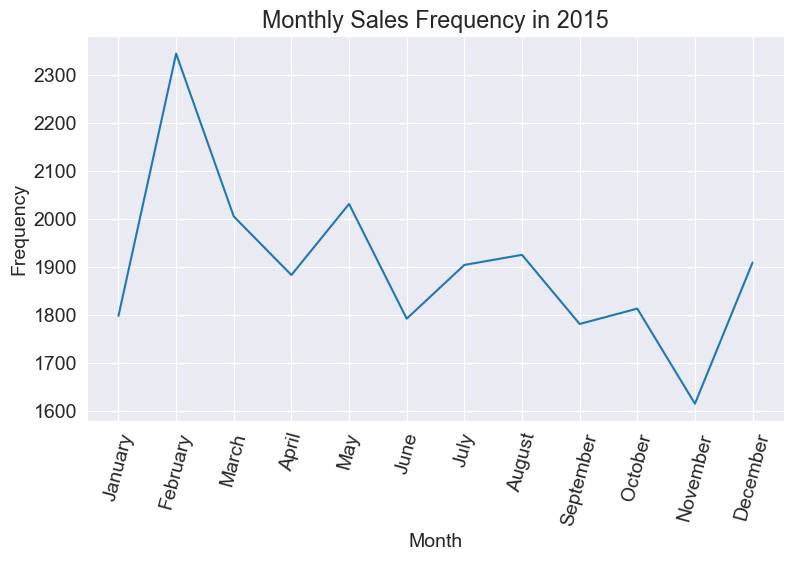

In [52]:
plt.plot('MonthName','InvoiceNo',data=sales_frequency_by_month_df)
plt.xticks(rotation=75)
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Monthly Sales Frequency in 2015');
# plt.savefig('Monthly Sales Frequency in 2015.png');

>**Summary**
>
>February was the busiest month in 2015, while November was the least busy.

>If the sales frequency is seasonal, inventory preparation using the data can help ensure the availability of high-demand products during peak months and minimize overstock of low-demand products during off-peak months.